# Alphalens Example Tear Sheet

**NOTE**: This is a branched version of the origina worksheet found [here](https://github.com/quantopian/alphalens/blob/master/alphalens/examples/tear_sheet_walk_through.ipynb)

There are major changes to this worksheet:
* we use iex ad data source (apparently yahoo won't provide free un-restricted access anymore)
* Code fixes to the underlying alphalens package (it looks is based on ancient pandas/python versions) 

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
def dumpdf(df, lenght=5):
    from IPython.display import display
    print(f"{df.__class__.__name__} shape={df.shape}")
    display(df.head(lenght))


import os
import sys; sys.path.insert(0, "/Users/sxope/Volumes/gdrive/Projects/bigq/alphaLx")
%load_ext autoreload
%autoreload 1
%aimport alphaL.cells

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ticker_sector = {
    "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
    "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
    "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
    "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
    "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
    "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
    "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
    "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
    "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
    "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
    "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
    "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
    "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
    "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
    "T" : 7, "CTL" : 7, "VZ" : 7, 
    "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
    "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
    "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
    "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
    "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
}

## 
ticker_sector = { k:v for k, v in ticker_sector.items() if k in { "A", "AAL", "AAP", "AAPL", "ABBV", }}

In [5]:
import os
import datetime
import pandas_datareader.data as web
start, end = datetime.datetime(2014, 12, 1), datetime.datetime(2017, 7, 1)
assert os.getenv("IEX_API_KEY"), "need to define IEX_API_KEY"
iex = web.DataReader(list(ticker_sector.keys()), "iex", start, end)

In [46]:
dumpdf(iex)

DataFrame shape=(651, 25)


Attributes     open                                  high                  \
Symbols        AAPL   ABBV      A    AAL     AAP     AAPL     ABBV      A   
date                                                                        
2014-12-01  29.7025  69.08  42.69  49.00  146.41  29.8125  69.5000  42.73   
2014-12-02  28.3750  68.88  41.60  48.12  146.71  28.9375  69.4901  42.10   
2014-12-03  28.9375  69.17  41.98  47.74  148.44  29.0875  69.4760  42.37   
2014-12-04  28.9425  68.35  42.15  49.60  152.42  29.3000  69.8600  42.68   
2014-12-05  28.9975  69.52  42.23  50.09  154.21  29.0200  70.1700  42.49   

Attributes                 ...    close                               \
Symbols       AAL     AAP  ...     AAPL   ABBV      A    AAL     AAP   
date                       ...                                         
2014-12-01  49.47  147.77  ...  28.7675  69.11  41.59  47.88  147.07   
2014-12-02  48.70  148.87  ...  28.6575  69.27  41.98  47.86  148.48   
2014-12-03  48.47  152.15  ...  28.9825  68.50  42.23  48.24  152.04   
2014-12-04  50.27  153.53  ...  28.8725  69.57  42.27  49.65  153.25   
2014-12-05  51.75  154.37  ...  28.7500  69.71  42.30  51.01  154.18   

Attributes       volume                                               
Symbols            AAPL       ABBV          A         AAL        AAP  
date                                                                  
2014-12-01  335256148.0  4885108.0  4411159.0  15151440.0  1220324.0  
2014-12-02  237395760.0  6491493.0  2014436.0  11853928.0  1022726.0  
2014-12-03  172253760.0  5821231.0  2250275.0   8917697.0  1046267.0  
2014-12-04  168623104.0  7670135.0  1346823.0  15233774.0   806361.0  
2014-12-05  153275580.0  4360127.0  1019549.0  15588179.0   909340.0  

[5 rows x 25 columns]

In [59]:
mapper = {
    "Symbols": lambda c: "asset",  # changes Symbols -> asset
    "date": lambda c: c,  # leaves it unchanged
    None: lambda c: c.capitalize(),  # capitalize all columns
}
pan = (
    iex
    .stack(level=1)
    .reset_index()
    .rename(lambda c: mapper[c if c in mapper else None](c), axis=1)
    .sort_values(["date", "asset"])
    .reset_index(drop=True)
)
pan.columns.name = None
pan["date"] = pd.to_datetime(pan["date"])

In [60]:
dumpdf(pan)

DataFrame shape=(3255, 7)


date asset      Open      High       Low     Close       Volume
0 2014-12-01     A   42.6900   42.7300   41.5800   41.5900    4411159.0
1 2014-12-01   AAL   49.0000   49.4700   47.3600   47.8800   15151440.0
2 2014-12-01   AAP  146.4100  147.7700  146.1300  147.0700    1220324.0
3 2014-12-01  AAPL   29.7025   29.8125   27.8175   28.7675  335256148.0
4 2014-12-01  ABBV   69.0800   69.5000   68.8300   69.1100    4885108.0

For demonstration purposes we will create a predictive factor. To cheat we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [61]:
lookahead_bias_days = 5

predictive_factor = pan[["date", "asset"]].copy()
predictive_factor["date"] = pd.to_datetime(predictive_factor["date"])
predictive_factor["pct"] = (
    pan
    .sort_values("date")
    .groupby(["asset"])
    .Open
    .pct_change(lookahead_bias_days)
)

predictive_factor["pct"] = (
    predictive_factor
    .sort_values("date")
    .groupby("asset")["pct"]
    .shift(-lookahead_bias_days)
)
predictive_factor = (
    predictive_factor
    .set_index(["date", "asset"])
)["pct"]

In [62]:
dumpdf(predictive_factor)

Series shape=(3255,)


date        asset
2014-12-01  A       -0.010775
            AAL      0.029388
            AAP      0.057920
            AAPL    -0.039643
            ABBV     0.010567
Name: pct, dtype: float64

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on  assets open prices.

In [63]:
pricing = (
    pan[["date", "asset", "Open"]]
    .pivot(index="date", columns="asset", values="Open")
    .iloc[1:]
)

In [64]:
dumpdf(pricing)

DataFrame shape=(650, 5)


asset           A    AAL     AAP     AAPL   ABBV
date                                            
2014-12-02  41.60  48.12  146.71  28.3750  68.88
2014-12-03  41.98  47.74  148.44  28.9375  69.17
2014-12-04  42.15  49.60  152.42  28.9425  68.35
2014-12-05  42.23  50.09  154.21  28.9975  69.52
2014-12-08  42.23  50.44  154.89  28.5250  69.81

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [65]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy" 
}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the tear sheet functions.

In [66]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

Dropped 1.7% entries from factor data: 1.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


The function inform the user how much data was dropped after formatting the input data. Factor data can be partially dropped due to being flawed itself (e.g. NaNs), not having provided enough price data to compute forward returns for all factor values, or because it is not possible to perform binning. It is possible to control the maximum allowed data loss using 'max_loss' argument.

In [67]:
dumpdf(factor_data)

DataFrame shape=(3200, 6)


1D        5D       10D    factor  \
date       asset                                           
2014-12-02 A      0.009135 -0.014663 -0.079327 -0.014663   
           AAL   -0.007897  0.020366  0.060058  0.020366   
           AAP    0.011792  0.036126  0.097403  0.036126   
           AAPL   0.019824 -0.029163 -0.062819 -0.029163   
           ABBV   0.004210 -0.009727 -0.054733 -0.009727   

                                   group  factor_quantile  
date       asset                                           
2014-12-02 A                 health_care                2  
           AAL               industrials                4  
           AAP    consumer_discretionary                5  
           AAPL   information_technology                1  
           ABBV              health_care                3

You'll notice that we've placed all of the information we need for our calculations into one dataframe. Variables are the columns, and observations are each row.

The integer columns represents the forward returns or the daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [69]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [70]:
dumpdf(mean_return_by_q_daily)

DataFrame shape=(3199, 3)


1D        5D       10D
factor_quantile date                                    
1               2014-12-02  0.012411 -0.029751 -0.054936
                2014-12-03 -0.007579 -0.032007 -0.057932
                2014-12-04 -0.006610 -0.027043 -0.030655
                2014-12-05  0.000145 -0.032756 -0.020252
                2014-12-08  0.003423 -0.038218 -0.022357

In [71]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=False)

In [73]:
dumpdf(mean_return_by_q)

DataFrame shape=(5, 3)


1D        5D       10D
factor_quantile                              
1               -0.007443 -0.037511 -0.033936
2               -0.003401 -0.014137 -0.013698
3                0.000180  0.000243 -0.000990
4                0.003116  0.013110  0.012389
5                0.007550  0.038314  0.036238

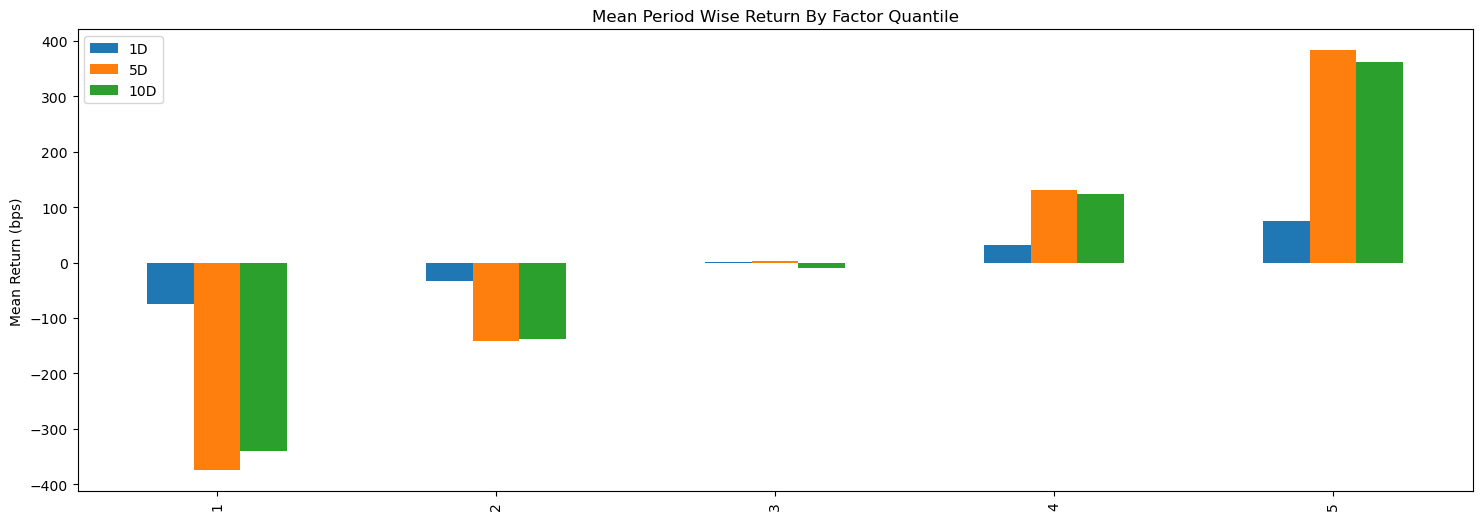

In [74]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

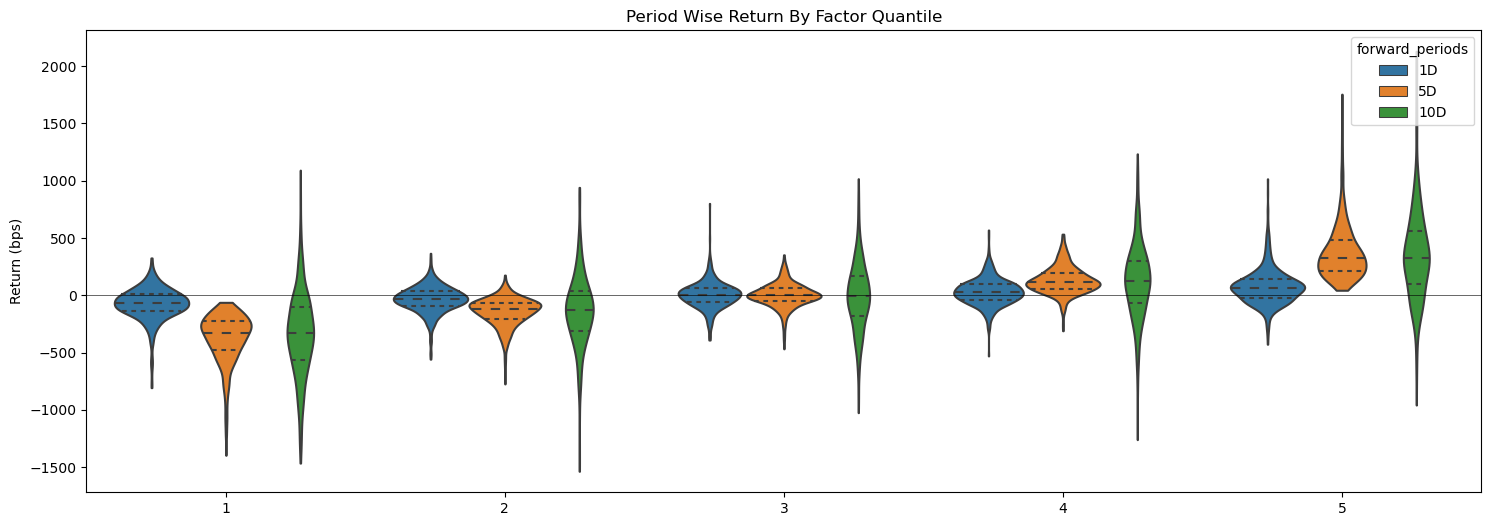

In [75]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [76]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

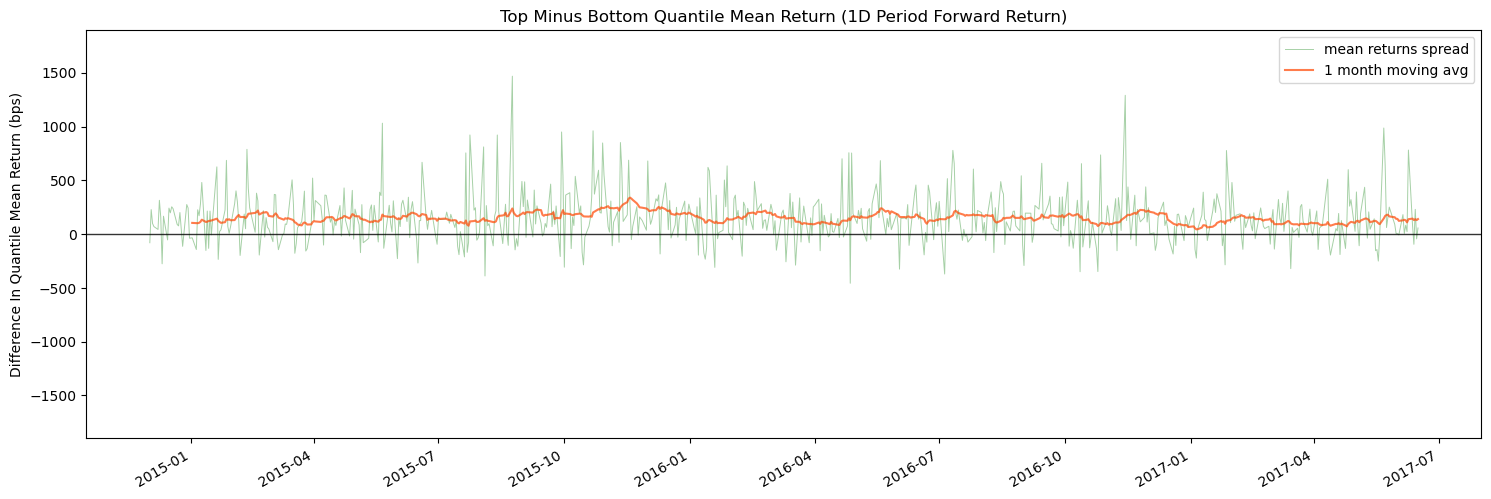

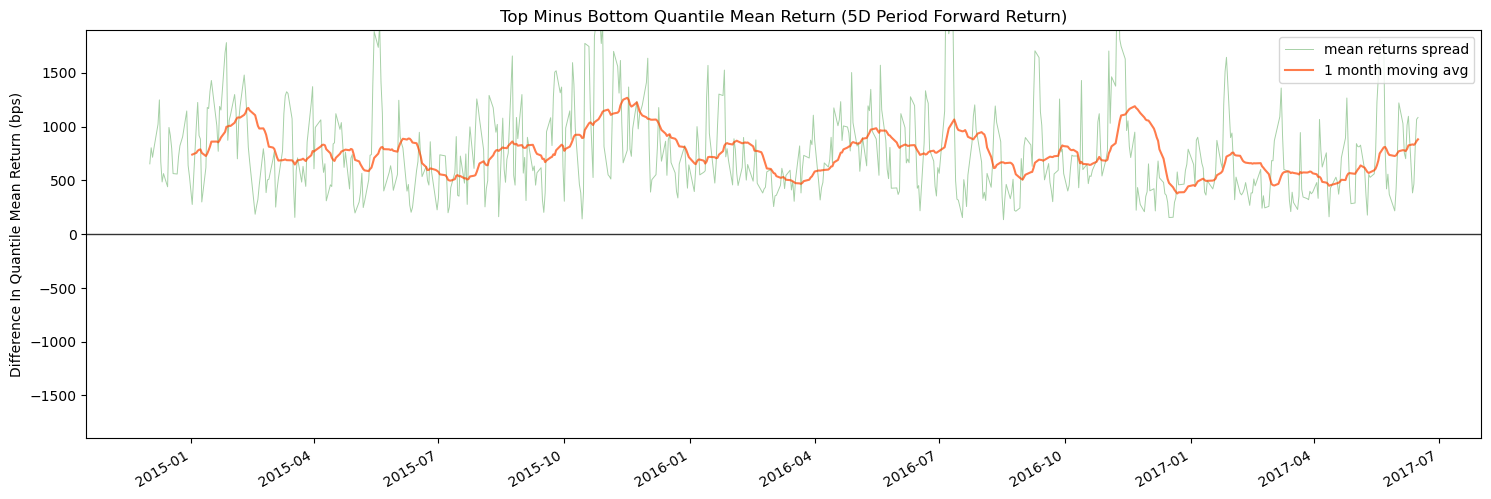

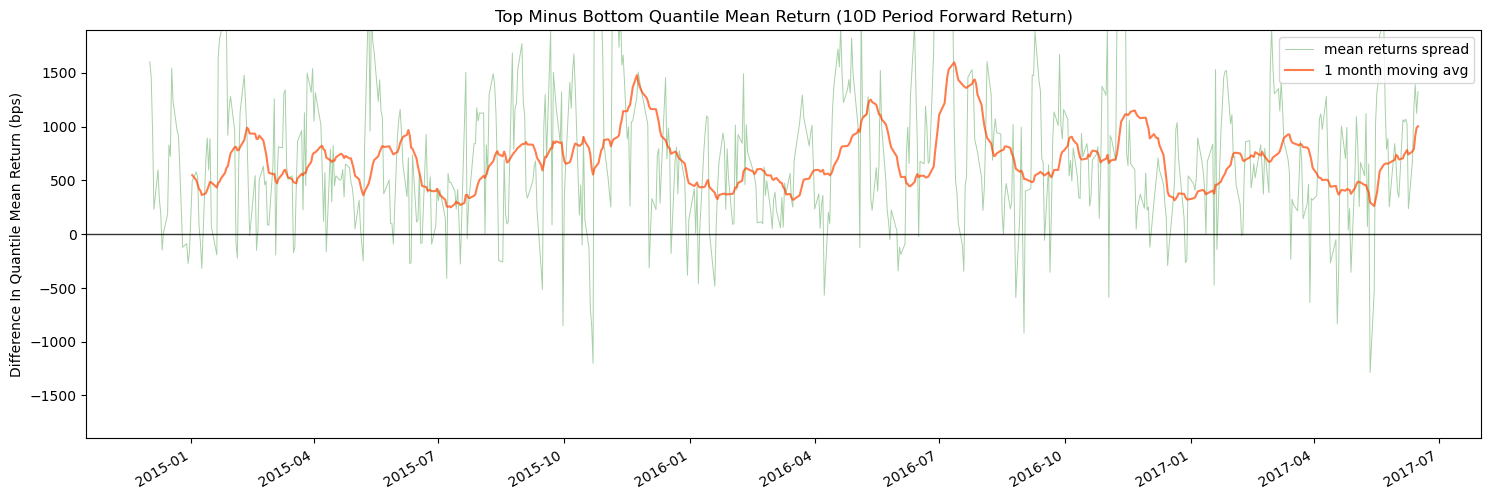

In [77]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

<Axes: title={'center': 'Cumulative Return by Quantile\n                    (1D Period Forward Return)'}, ylabel='Log Cumulative Returns'>

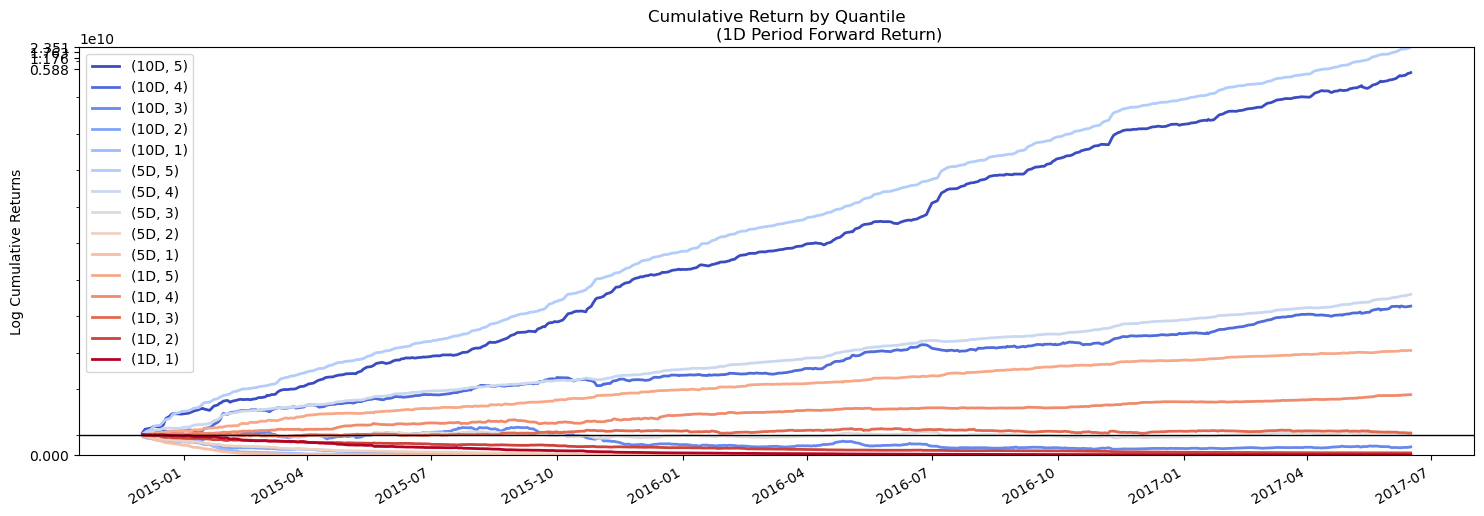

In [78]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period='1D')

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [79]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [80]:
ls_factor_returns.head()

1D        5D       10D
date                                    
2014-12-02 -0.004607  0.026016  0.074957
2014-12-03  0.015687  0.033924  0.059242
2014-12-04  0.002755  0.029133  0.032793
2014-12-05  0.005075  0.038761  0.023383
2014-12-08  0.003363  0.043213  0.026267

<Axes: title={'center': 'Portfolio Cumulative Return (1D Fwd Period)'}, ylabel='Cumulative Returns'>

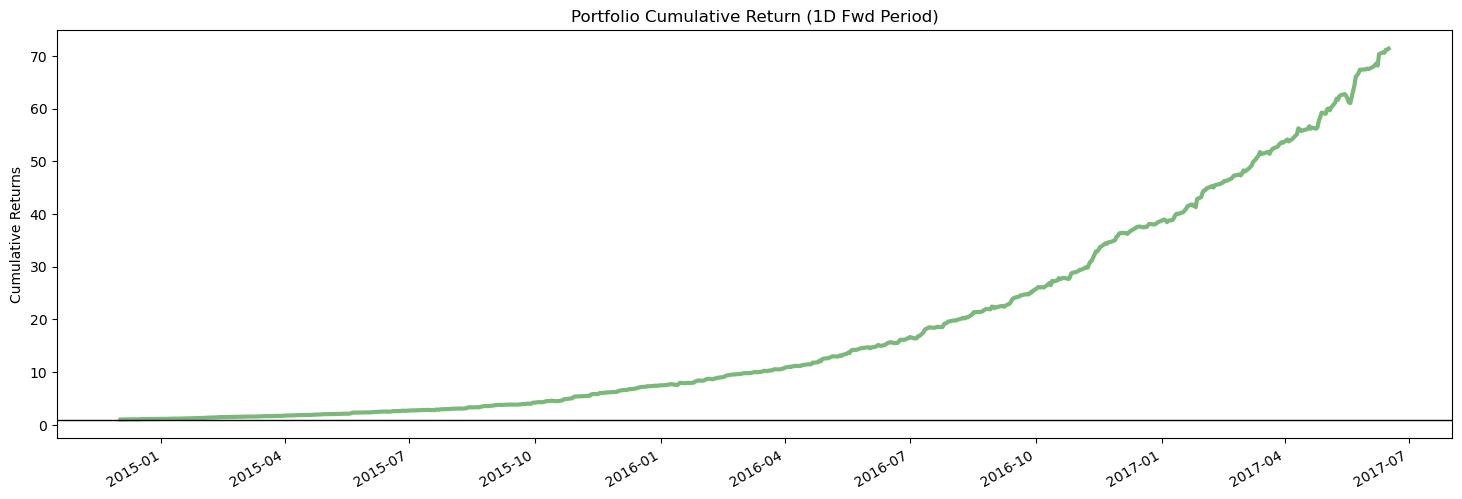

In [81]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['1D'], period='1D')

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [82]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [83]:
alpha_beta

1D        5D       10D
Ann. alpha  4.393022  4.114120  1.131635
beta        0.096425  0.092565  0.075581

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, and beta.

## Returns Tear Sheet

We can view all returns analysis calculations together.

Returns Analysis


1D       5D     10D
Ann. alpha                                       4.393    4.114   1.132
beta                                             0.096    0.093   0.076
Mean Period Wise Return Top Quantile (bps)      75.495   75.480  35.661
Mean Period Wise Return Bottom Quantile (bps)  -74.433  -76.173 -34.465
Mean Period Wise Spread (bps)                  149.929  151.598  70.058

<Figure size 640x480 with 0 Axes>

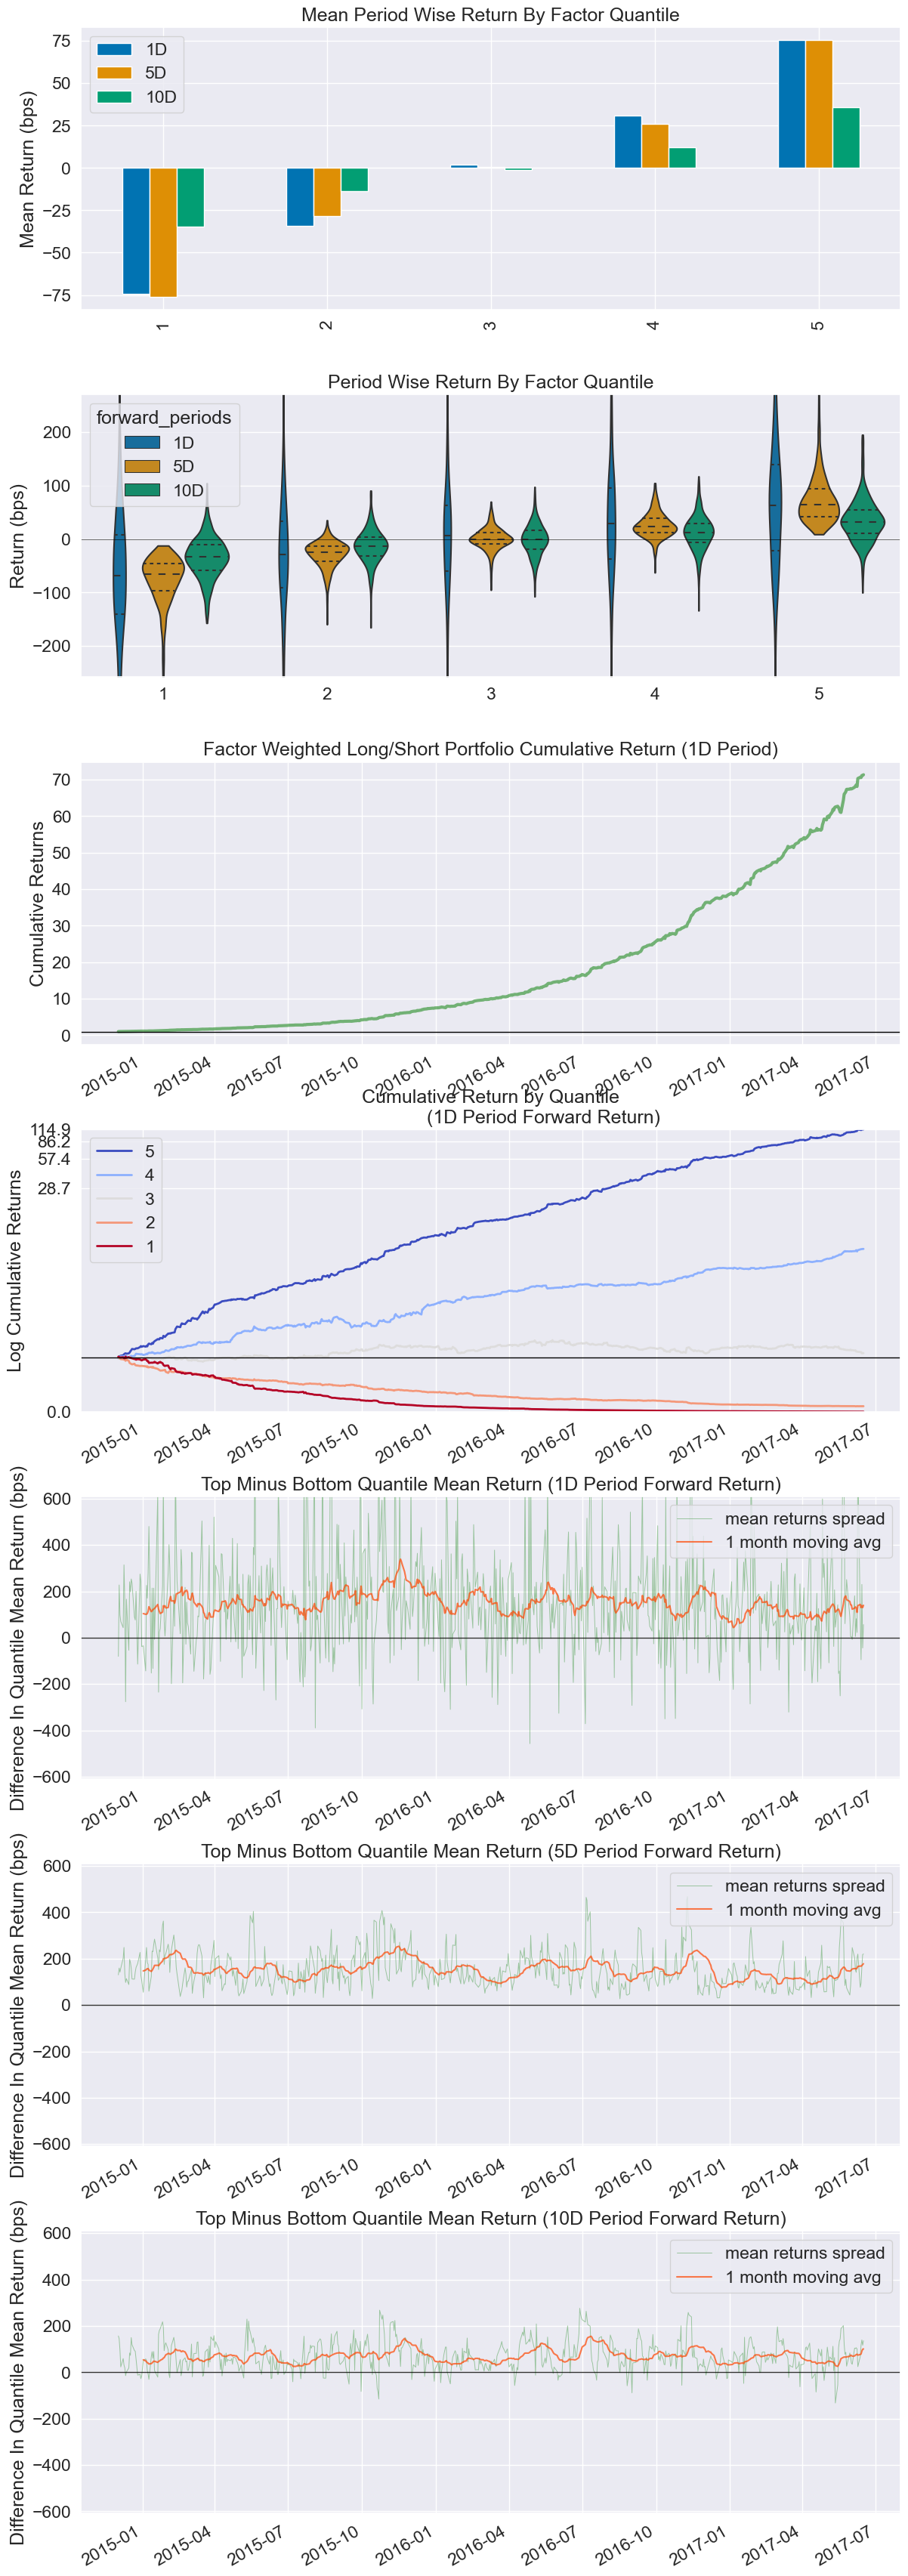

In [84]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

In [85]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [86]:
ic.head()

1D   5D  10D
date                     
2014-12-02 -0.4  1.0  0.9
2014-12-03  0.5  1.0  1.0
2014-12-04  0.7  1.0  0.9
2014-12-05  0.9  1.0  0.8
2014-12-08  0.3  1.0  1.0

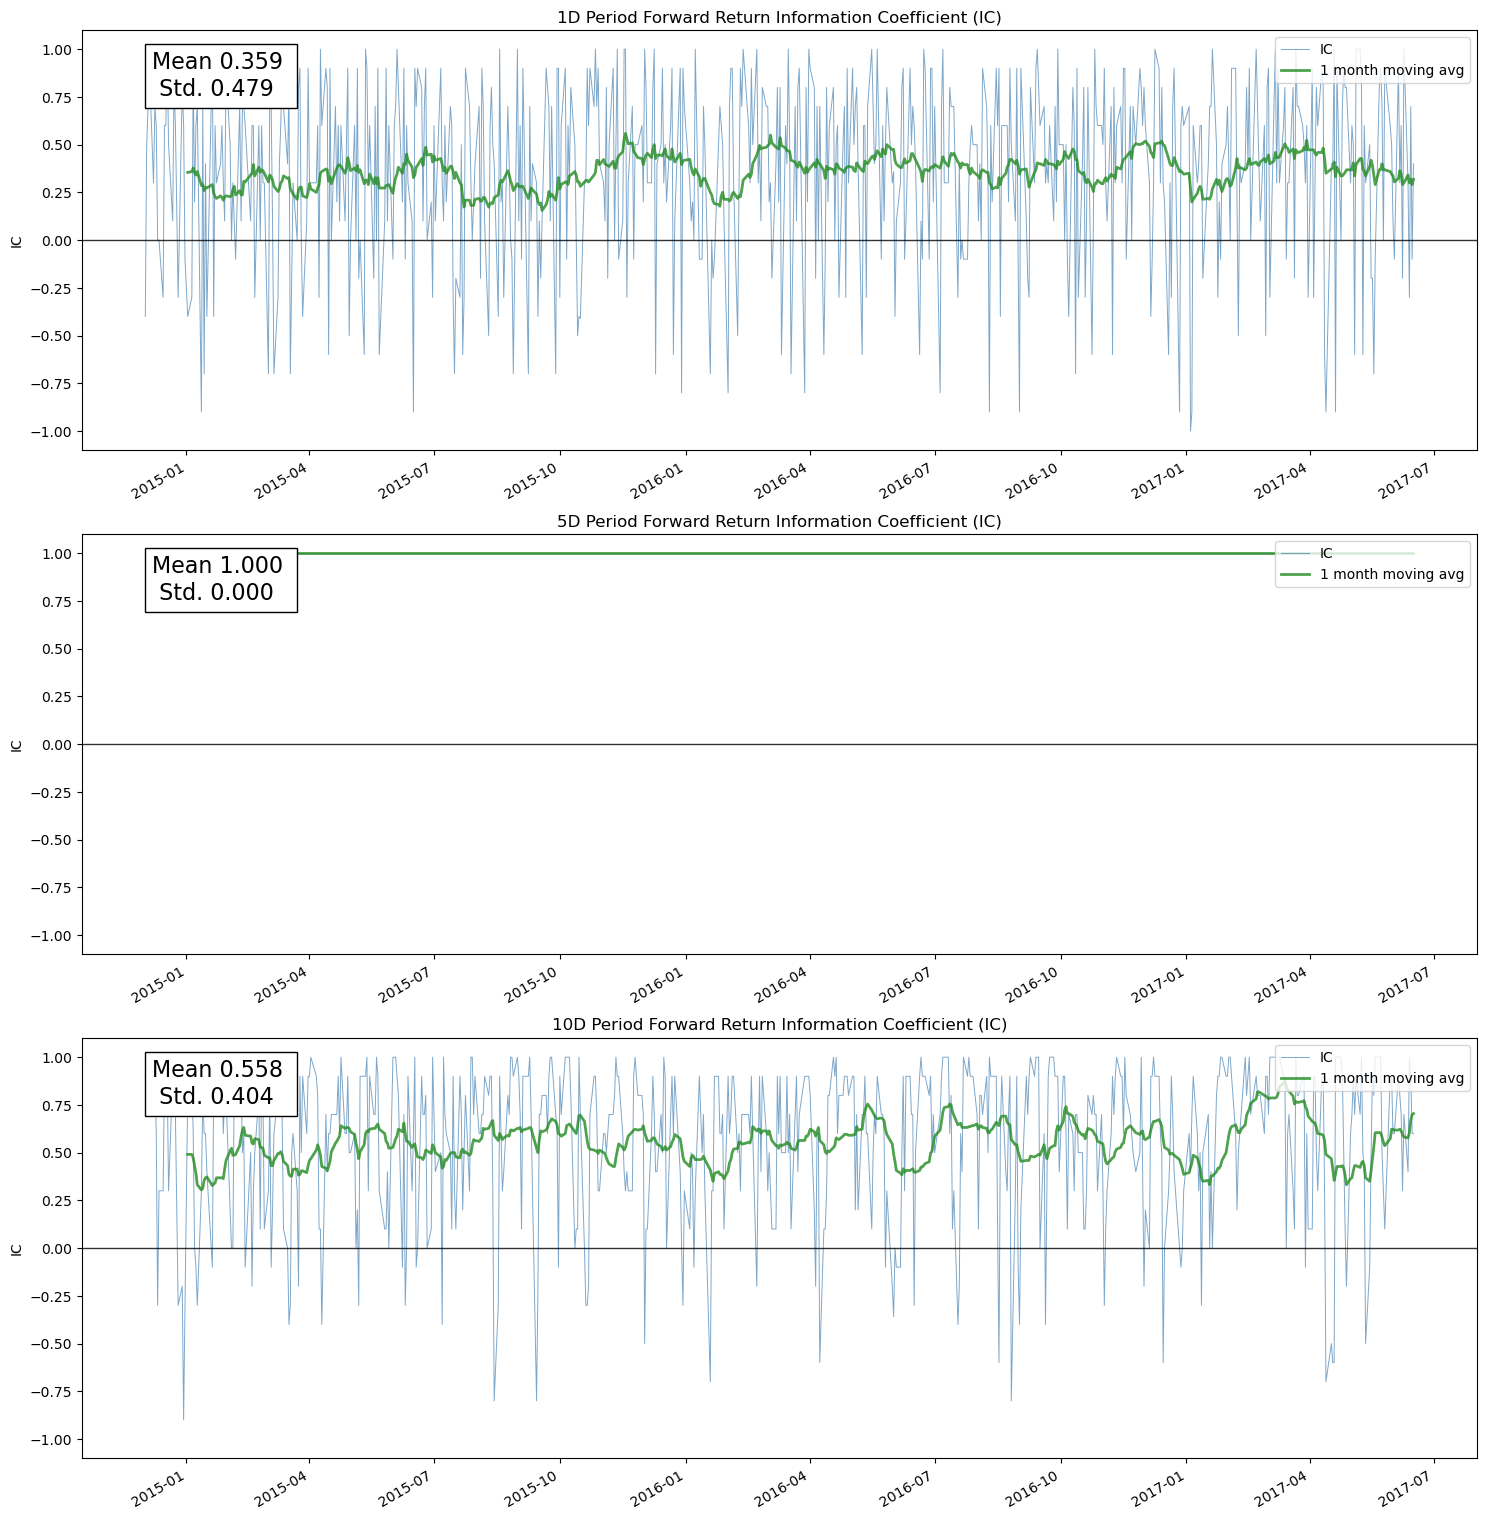

In [87]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

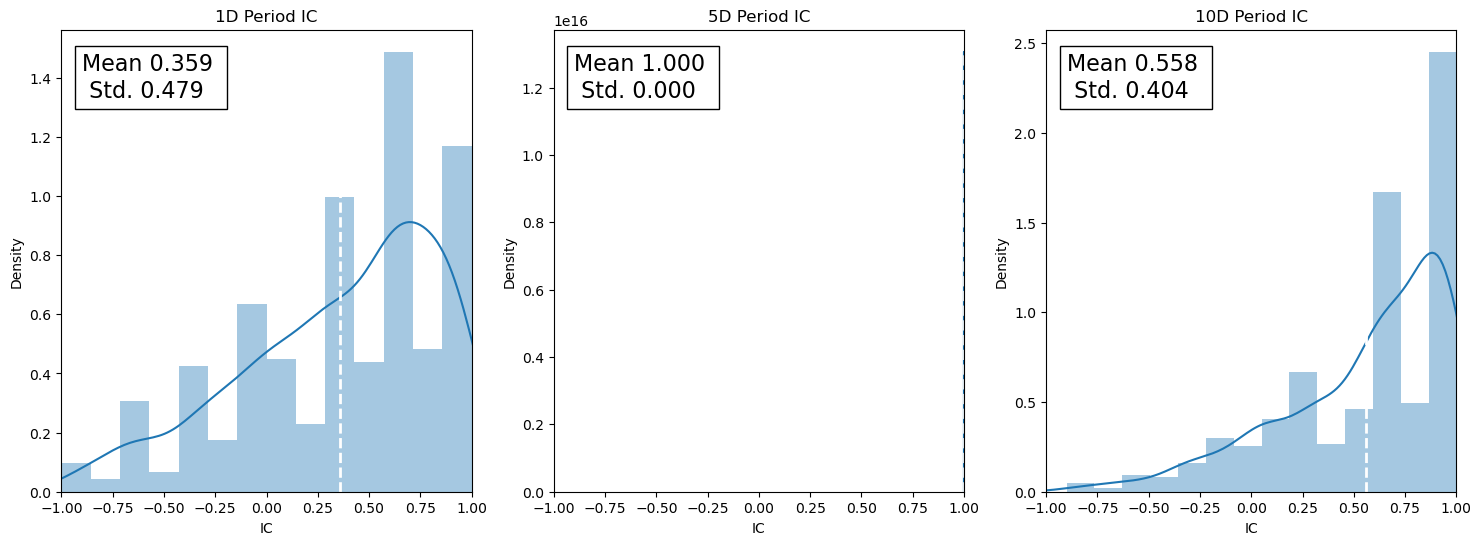

In [88]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

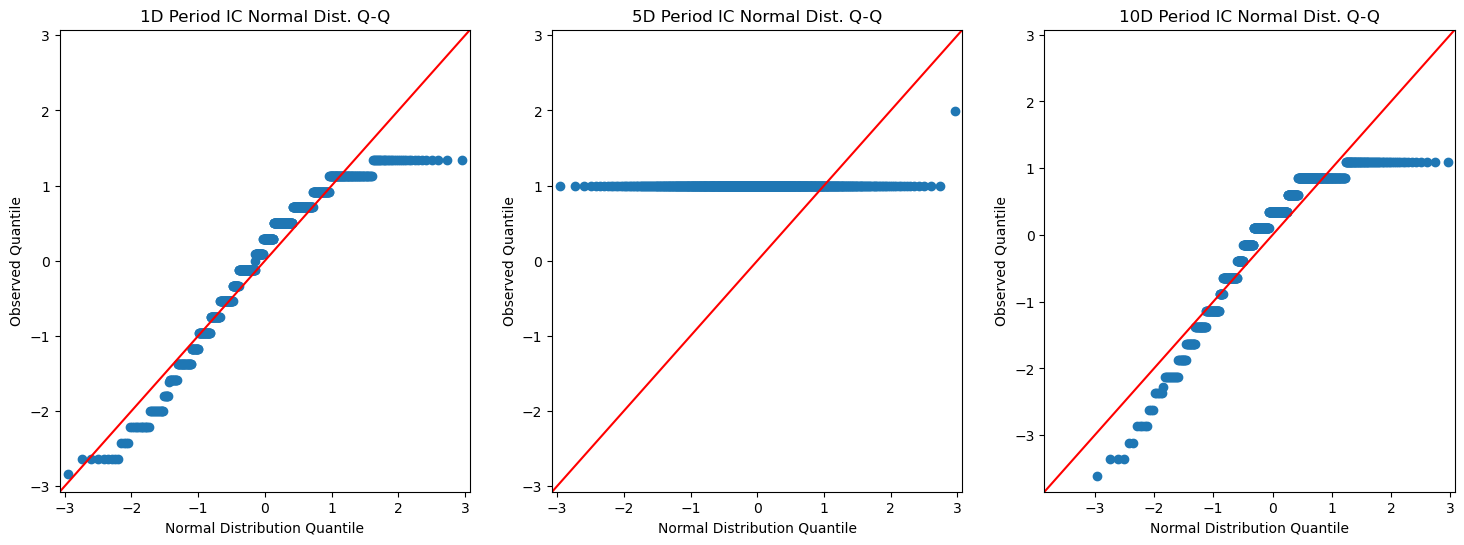

In [89]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [90]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')

In [91]:
mean_monthly_ic.head()

1D   5D       10D
date                               
2014-12-31  0.390476  1.0  0.476190
2015-01-31  0.230000  1.0  0.565000
2015-02-28  0.336842  1.0  0.447368
2015-03-31  0.250000  1.0  0.431818
2015-04-30  0.380952  1.0  0.614286

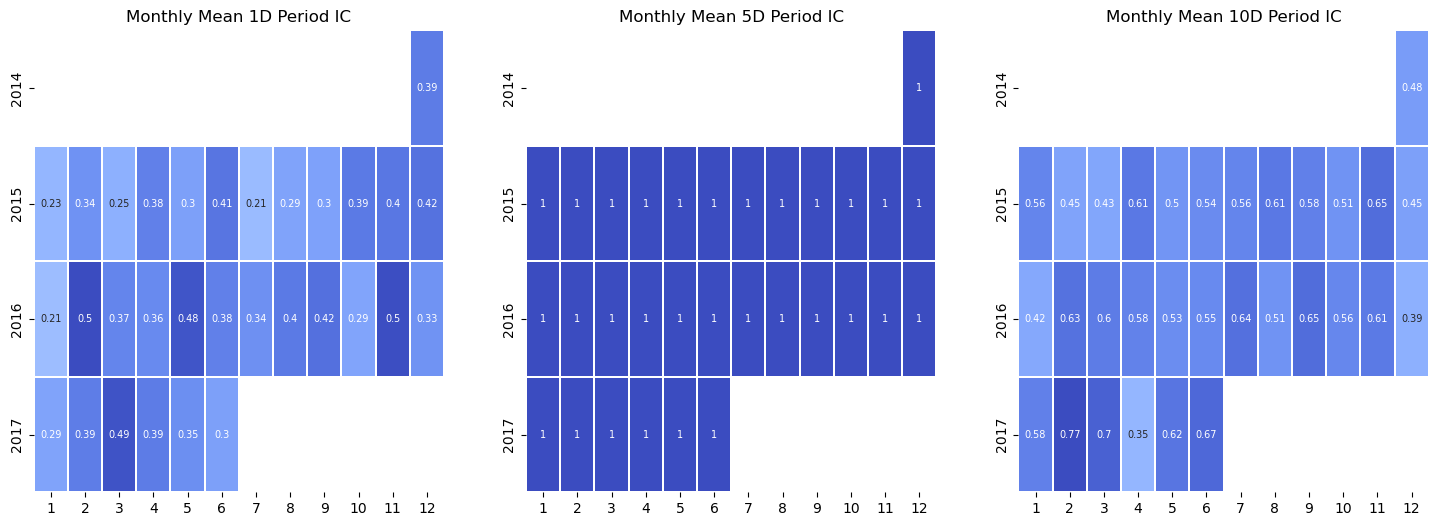

In [92]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

## Information Tear Sheet

We can view all information analysis calculations together.

Information Analysis


1D            5D     10D
IC Mean            0.359  1.000000e+00   0.558
IC Std.            0.479  0.000000e+00   0.404
Risk-Adjusted IC   0.751  8.979139e+15   1.381
t-stat(IC)        18.998  2.271563e+17  34.949
p-value(IC)        0.000  0.000000e+00   0.000
IC Skew           -0.719           NaN  -1.090
IC Kurtosis       -0.291           NaN   0.596

<Figure size 640x480 with 0 Axes>

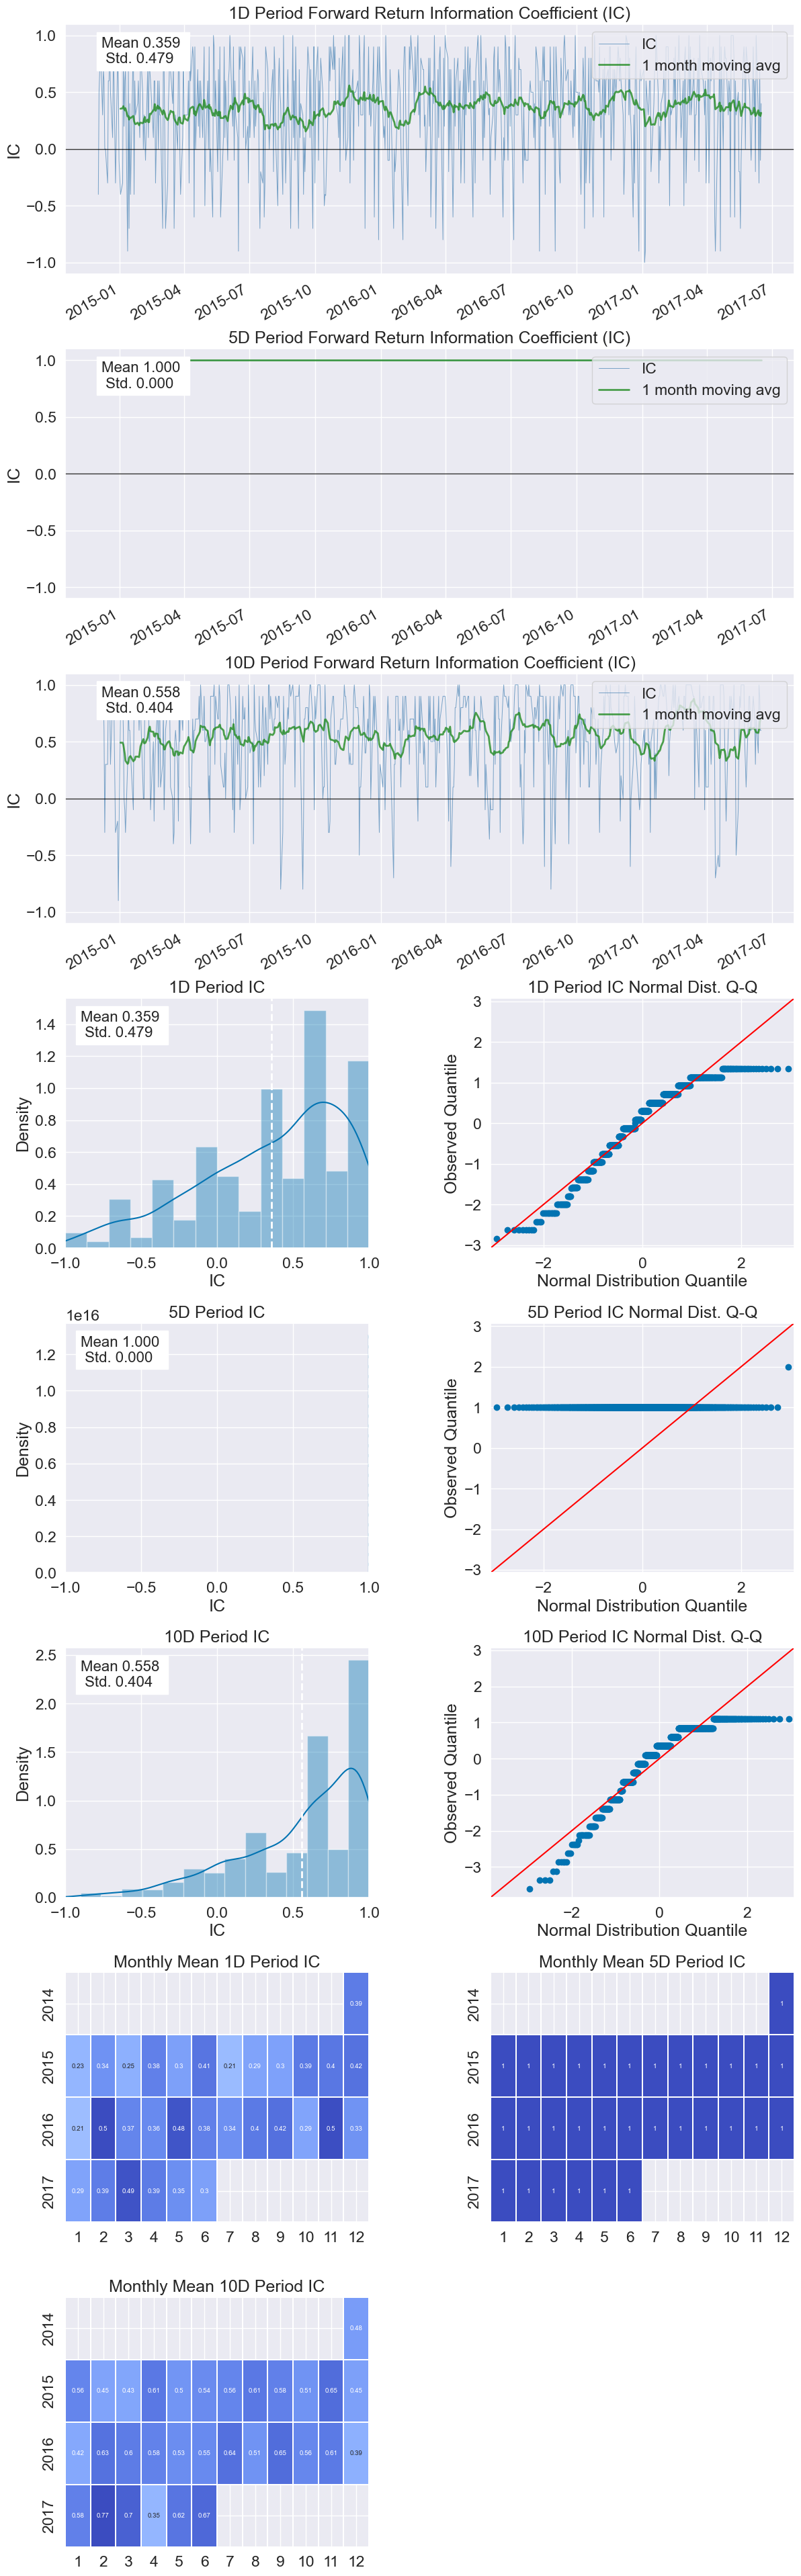

In [93]:
alphalens.tears.create_information_tear_sheet(factor_data)

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

In [94]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [95]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, turnover_period)
                               for q in range(1, int(quantile_factor.max()) + 1)], axis=1)

In [96]:
quantile_turnover.head()

1    2    3    4    5
date                               
2014-12-02  NaN  NaN  NaN  NaN  NaN
2014-12-03  1.0  1.0  0.0  0.0  0.0
2014-12-04  0.0  0.0  0.0  0.0  0.0
2014-12-05  0.0  0.0  0.0  1.0  1.0
2014-12-08  1.0  1.0  1.0  1.0  1.0

<Axes: title={'center': '1D Period Top and Bottom Quantile Turnover'}, ylabel='Proportion Of Names New To Quantile'>

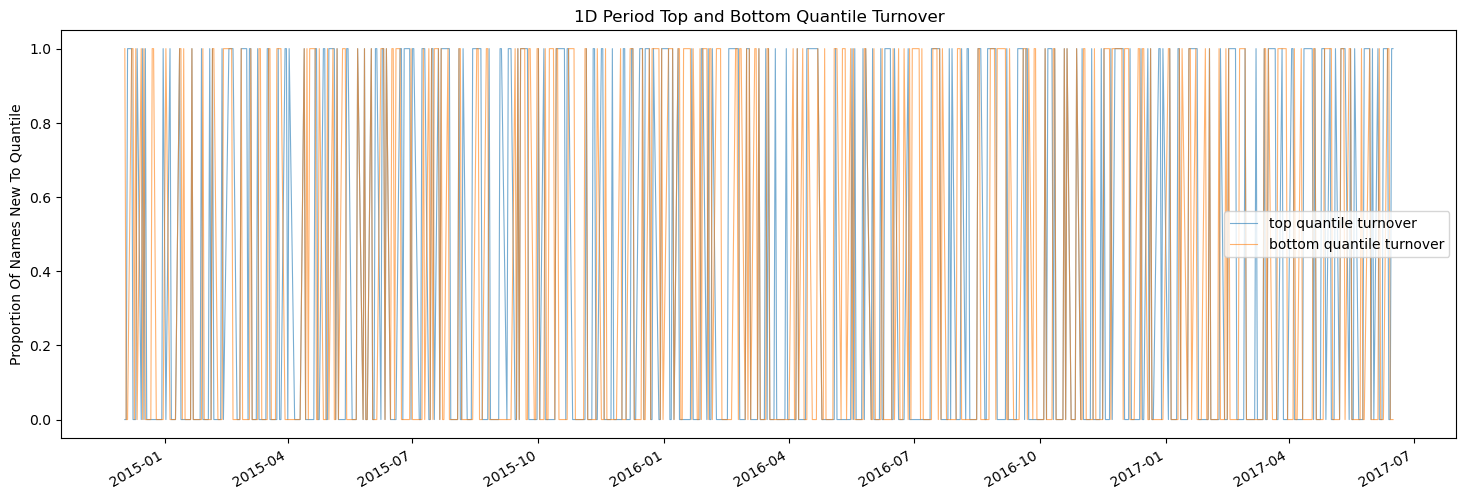

In [97]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, turnover_period)

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [98]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, turnover_period)

In [99]:
factor_autocorrelation.head()

date
2014-12-02    NaN
2014-12-03    0.9
2014-12-04    1.0
2014-12-05    0.9
2014-12-08    0.6
Name: 1, dtype: float64

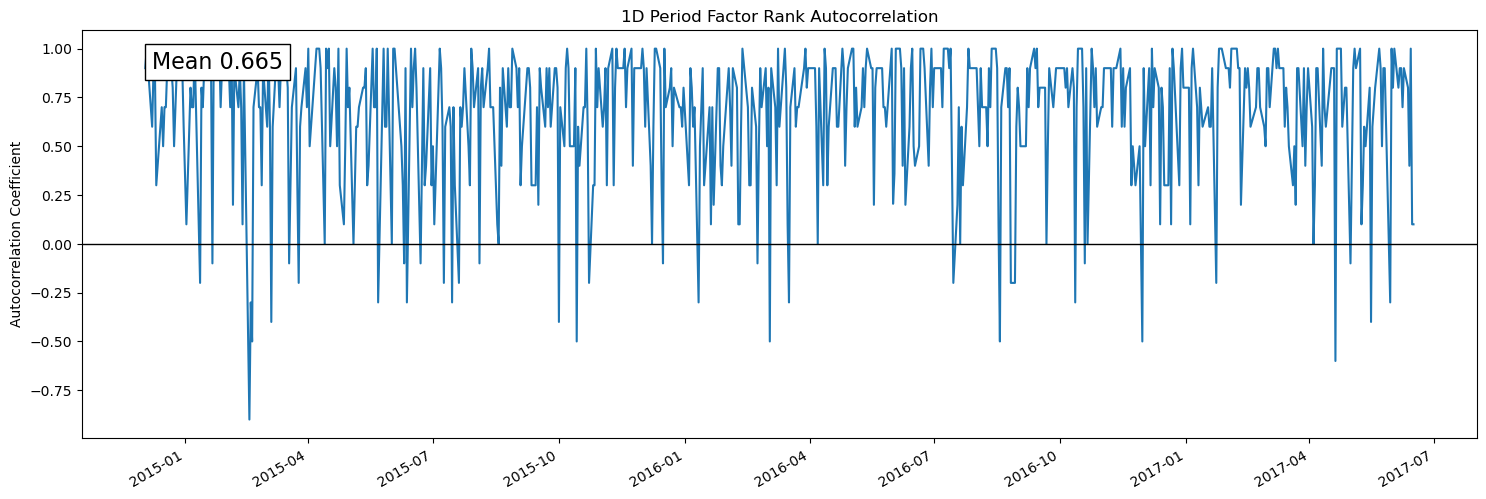

In [100]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

## Turnover Tear Sheet

We can view all turnover calculations together.

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.376  0.825  0.779
Quantile 2 Mean Turnover   0.606  0.791  0.822
Quantile 3 Mean Turnover   0.660  0.813  0.781
Quantile 4 Mean Turnover   0.603  0.800  0.785
Quantile 5 Mean Turnover   0.388  0.797  0.776

1D     5D    10D
Mean Factor Rank Autocorrelation  0.665 -0.046  0.033

<Figure size 640x480 with 0 Axes>

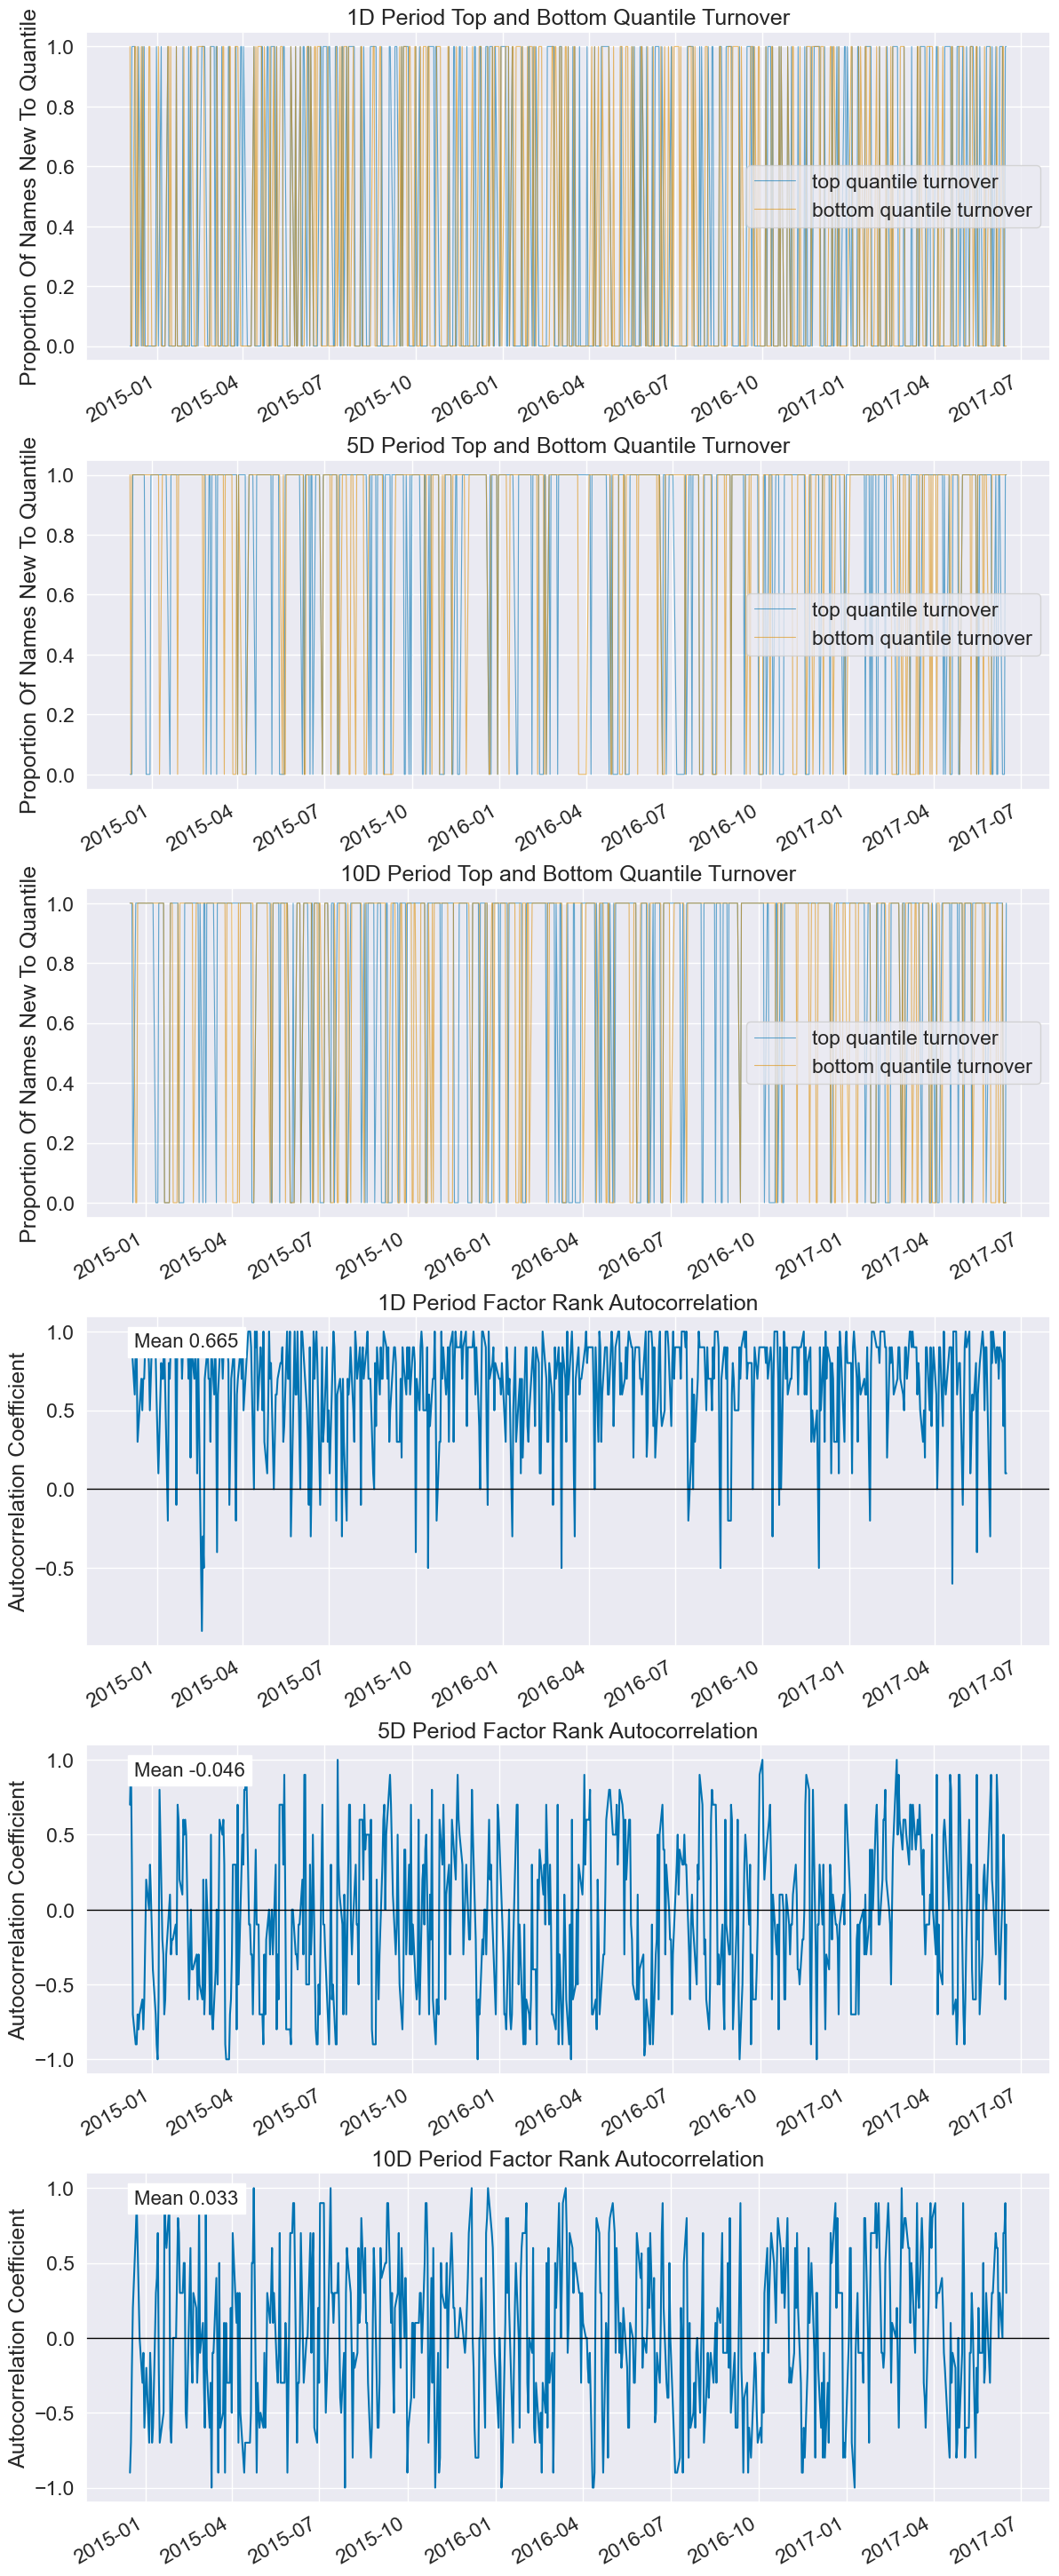

In [101]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

# Event Style Returns Analysis

Looking at the average cumulative return in a window before and after a factor can indicate to us how long the predicative power of a factor lasts. This tear sheet takes a while to run.

**NOTE:** This tear sheet takes in an extra argument `pricing`.

<Figure size 640x480 with 0 Axes>

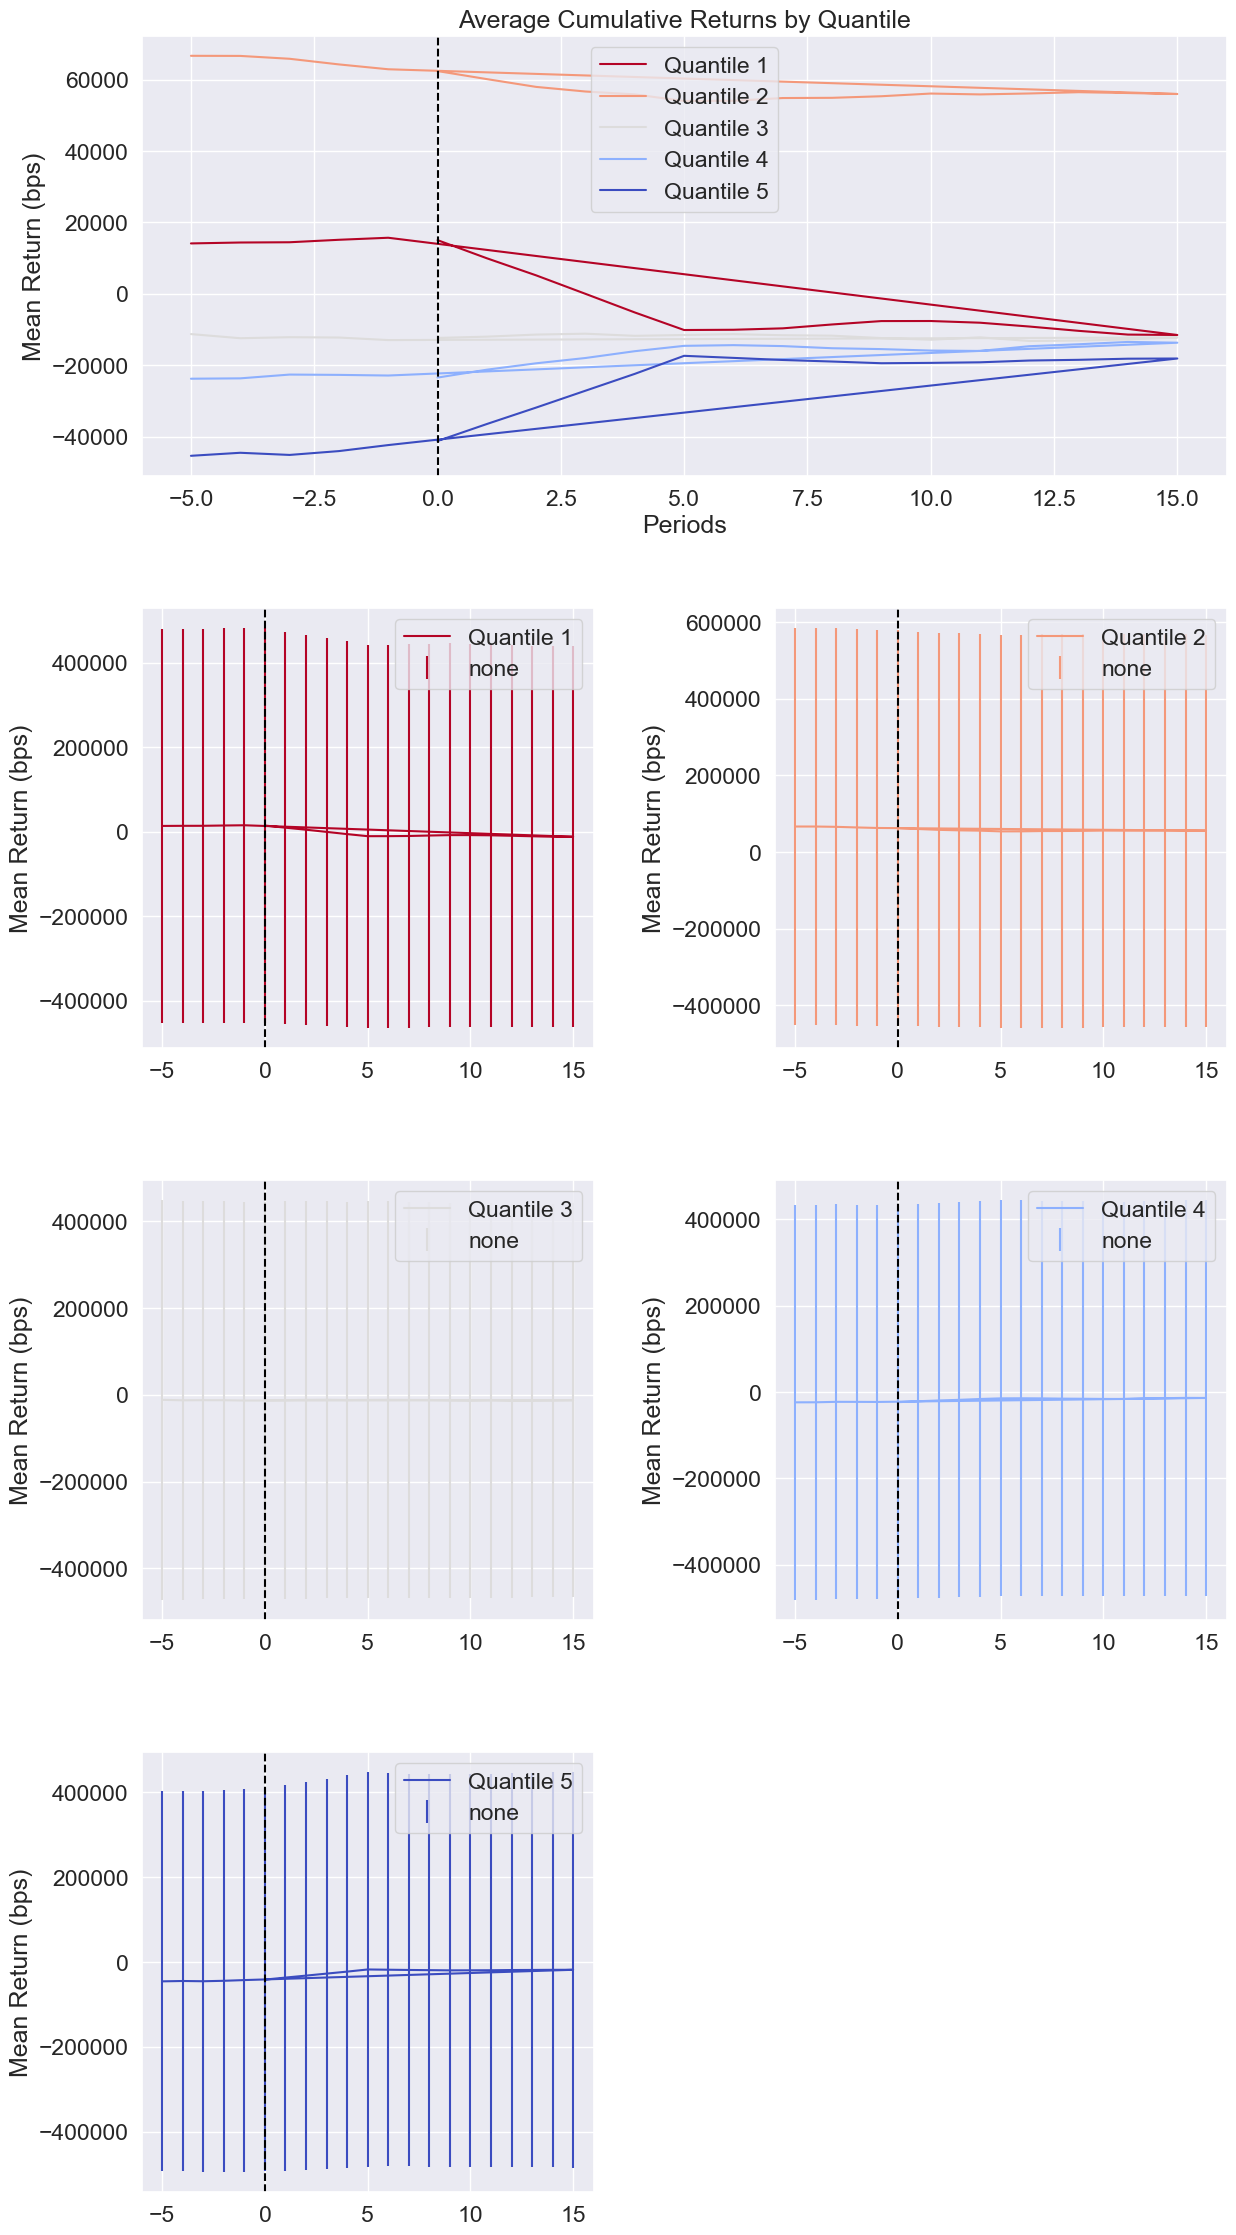

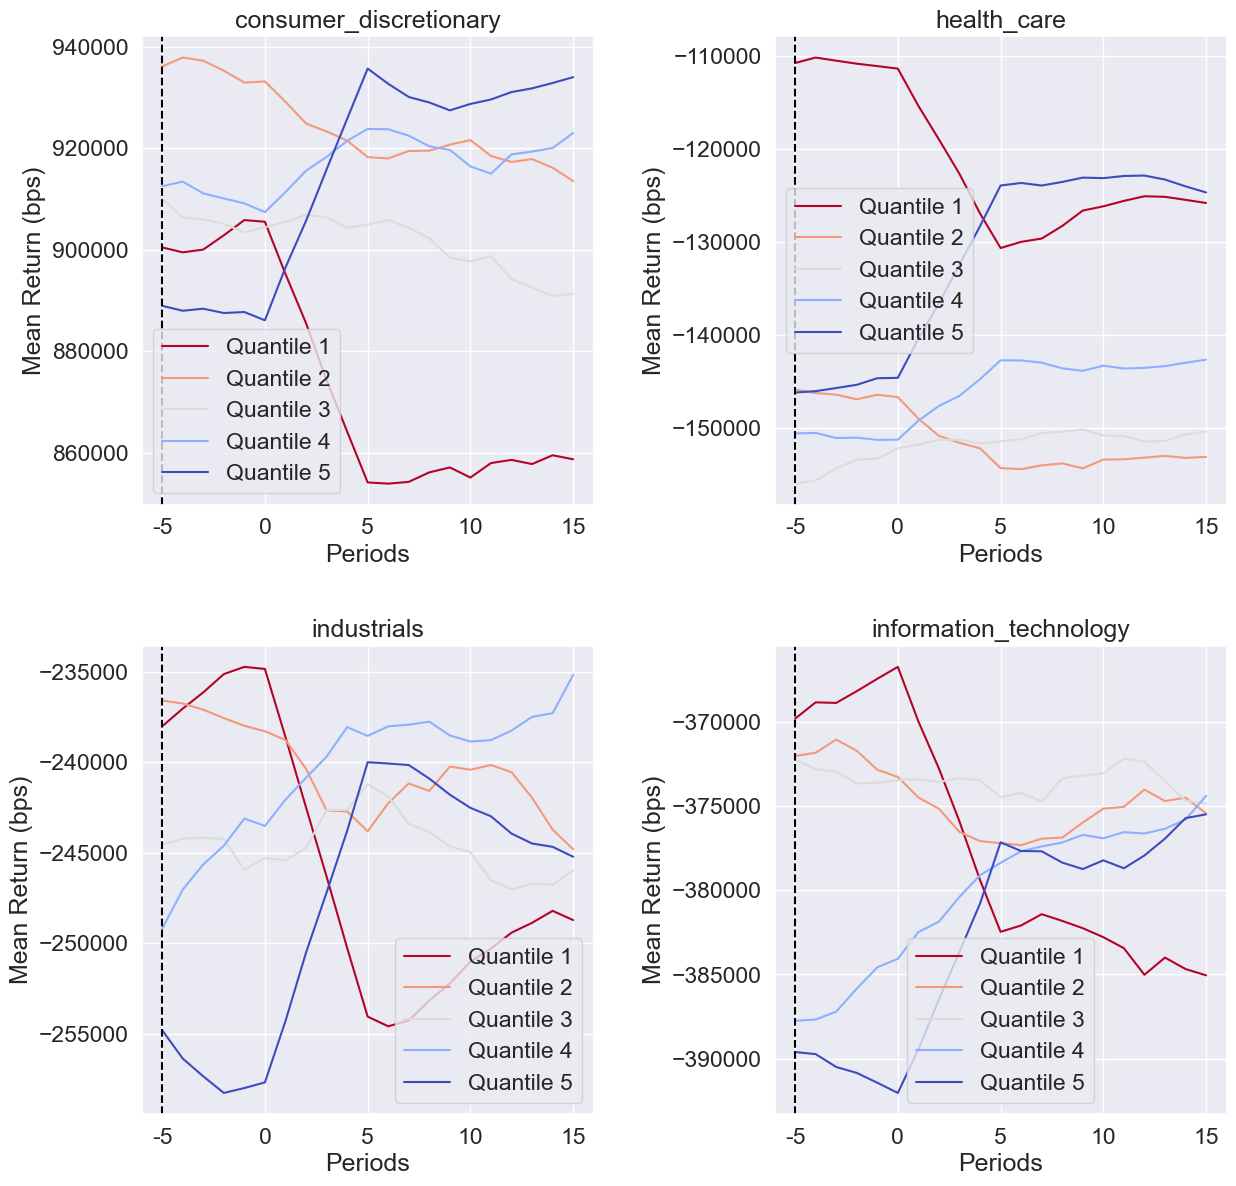

In [102]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, pricing, by_group=True)

# Groupwise

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided. The returns and information tear sheets can be viewed groupwise by passing in the `by_group=True` argument.

In [103]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

In [104]:
ic_by_sector.head()

1D   5D  10D
group                                     
consumer_discretionary       NaN  NaN  NaN
health_care             0.280125  1.0  0.5
industrials                  NaN  NaN  NaN
information_technology       NaN  NaN  NaN

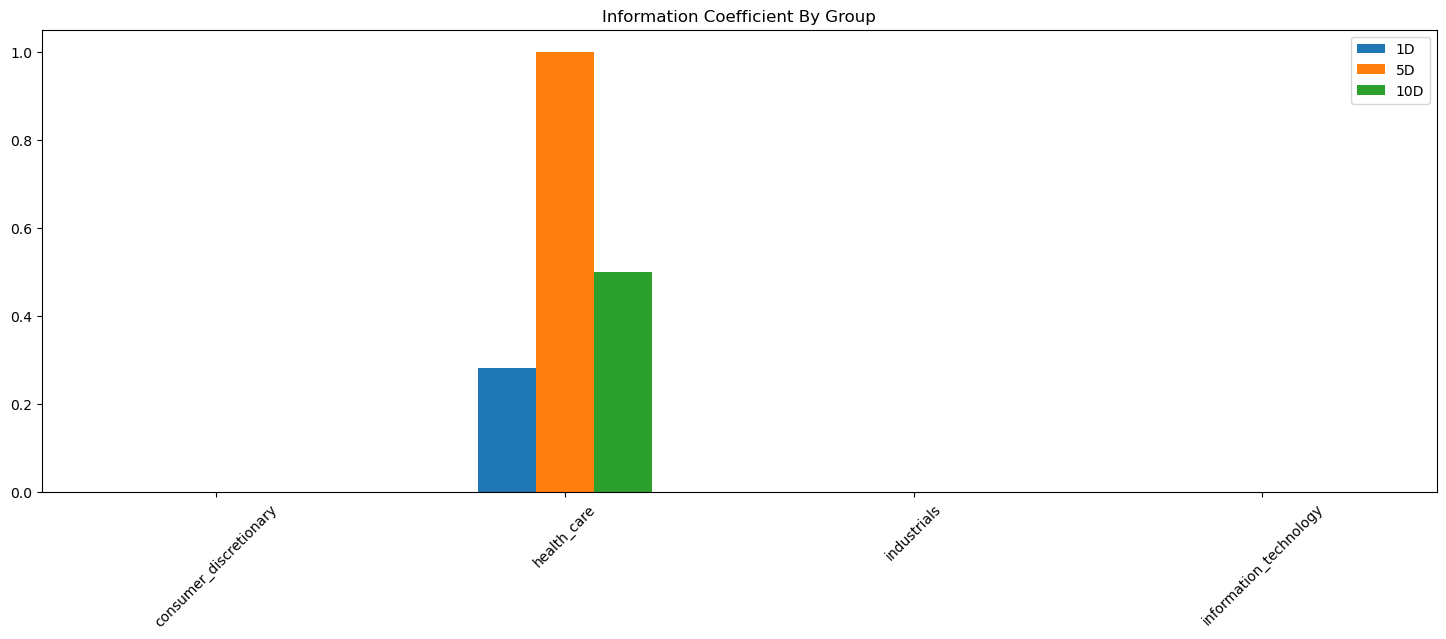

In [105]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [106]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, by_group=True)

In [107]:
mean_return_quantile_sector.head()

1D        5D       10D
factor_quantile group                                               
1               consumer_discretionary -0.007745 -0.039693 -0.039352
                health_care            -0.006750 -0.032784 -0.026060
                industrials            -0.008449 -0.043626 -0.040562
                information_technology -0.006641 -0.033202 -0.030949
2               consumer_discretionary -0.003596 -0.015004 -0.016527

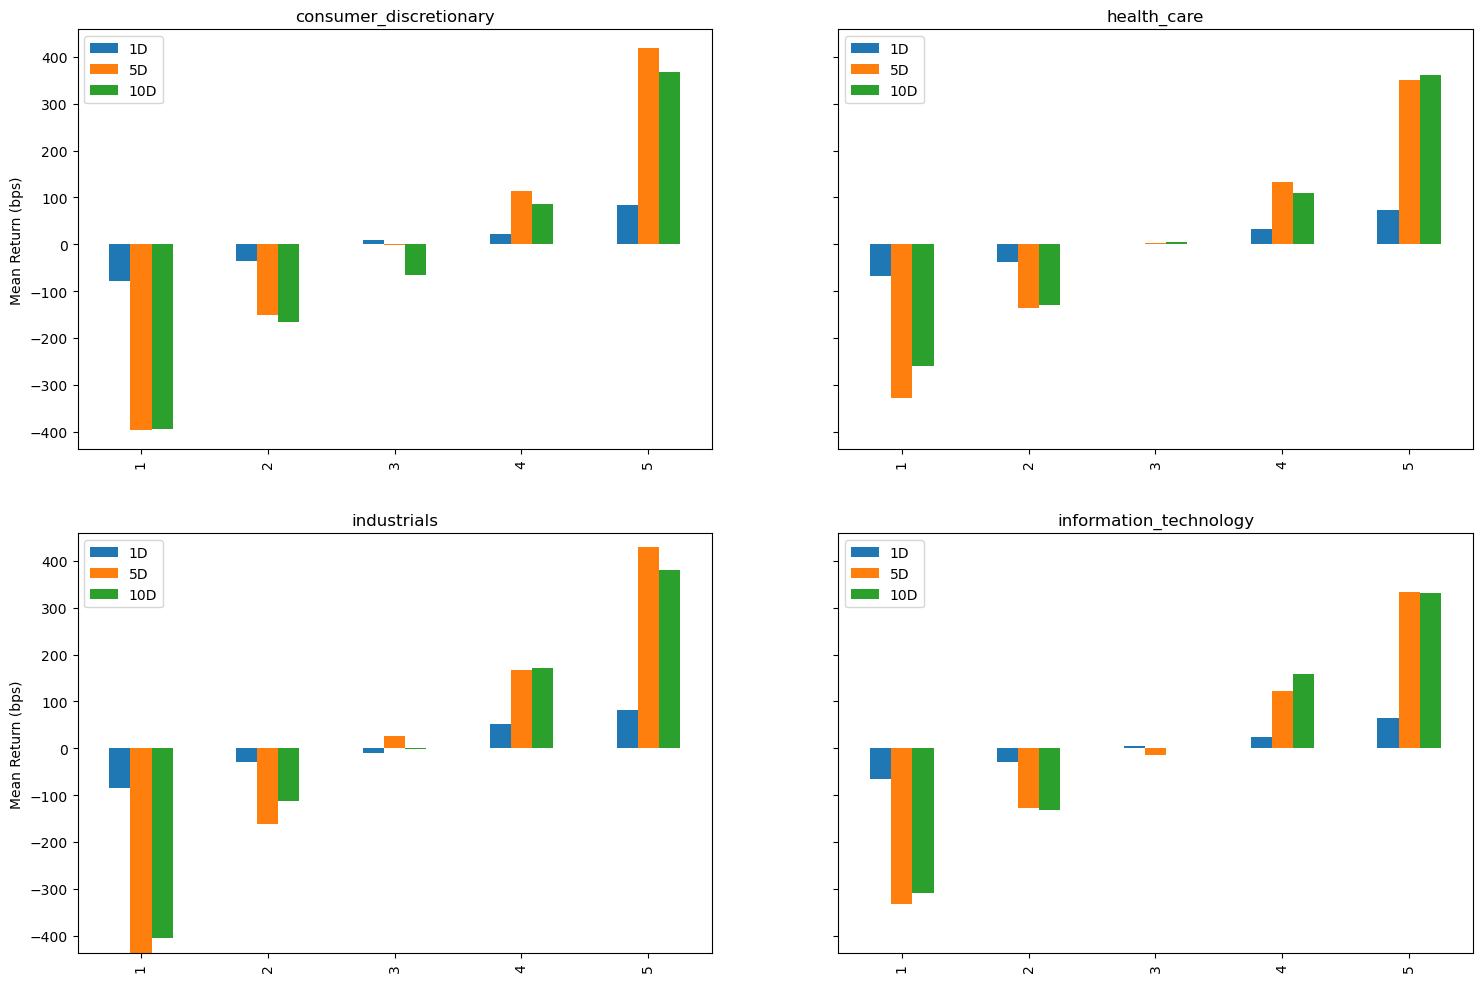

In [108]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

# Summary Tear Sheet

There are a lot of plots above. If you want a quick snapshot of how the alpha factor performs consider the summary tear sheet.

In [109]:
alphalens.tears.create_summary_tear_sheet(factor_data)

TypeError: Cannot perform min with non-ordered Categorical

<Figure size 640x480 with 0 Axes>

<Figure size 1400x7700 with 0 Axes>

# The Whole Thing

If you want to see all of the results create a full tear sheet. By passing in the factor data you can analyze all of the above statistics and plots at once.

In [ ]:
alphalens.tears.create_full_tear_sheet(factor_data)